<a href="https://colab.research.google.com/github/rrankawat/opencv-basic/blob/main/01_Image_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Import Libraries

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.12.0'

###### Helper to display images inline (since cv2.imshow won't work)

In [8]:
def show(img, cmap=None):
  if len(img.shape) == 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img, cmap)
  plt.axis('off')
  plt.show()

###### Load an Image from Colab Files

In [17]:
from google.colab import files
uploaded = files.upload()  # upload an image file manually

Saving girl.webp to girl.webp


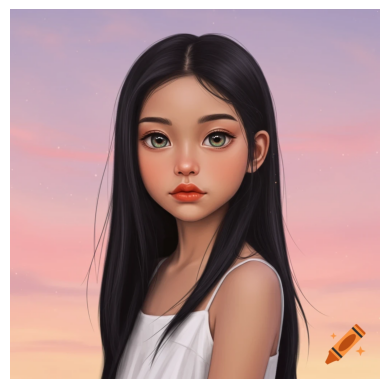

In [18]:
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)
show(img)

In [19]:
img.shape

(1024, 1024, 3)

###### Resize and Crop

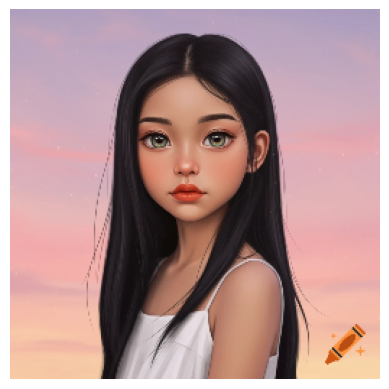

In [21]:
resized = cv2.resize(img, (256, 256))
show(resized)

In [22]:
resized.shape

(256, 256, 3)

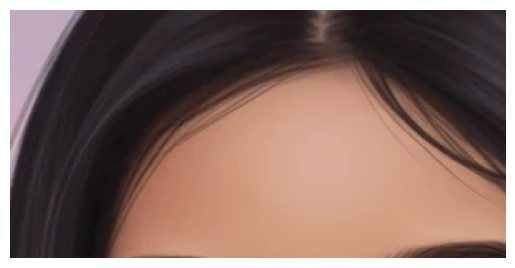

In [31]:
cropped = img[150:300, 300:600]
show(cropped)

###### Convert to Grayscale & Apply Filters

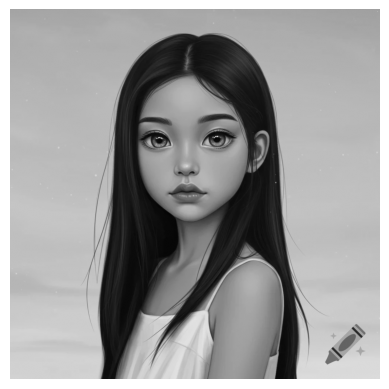

In [33]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray, cmap='gray')

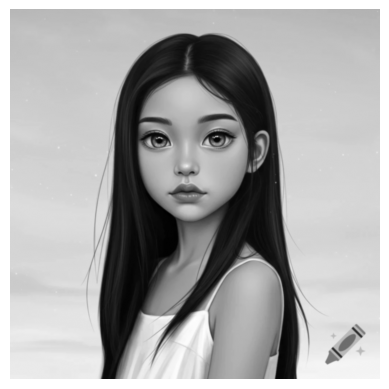

In [37]:
blur =  cv2.GaussianBlur(gray, (5, 5), 0)
show(blur, cmap='gray')

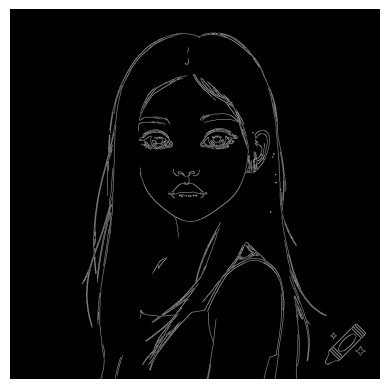

In [35]:
edges = cv2.Canny(gray, 100, 200)
show(edges, cmap='gray')

###### Draw Shapes and Text

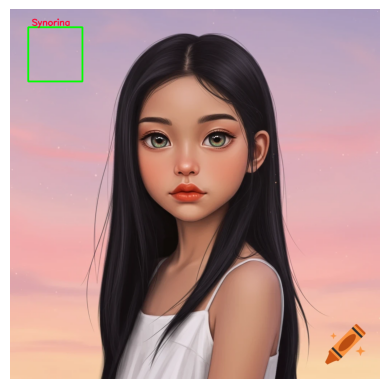

In [41]:
img_draw = img.copy()
cv2.rectangle(img_draw, (50, 50), (200, 200), (0, 255, 0), 3)
cv2.putText(img_draw, 'Synorina', (60, 45), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (44, 0, 255), 2)
show(img_draw)

###### Detect Contours

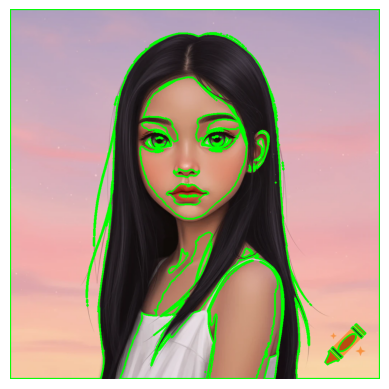

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rat, thresh = cv2.threshold(gray, 127, 255, 0)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 3)
show(contour_img)

###### Webcam Alternative (Colab can’t access our camera)

In [43]:
from google.colab import files
uploaded_video = files.upload()

Saving fishes.mp4 to fishes.mp4


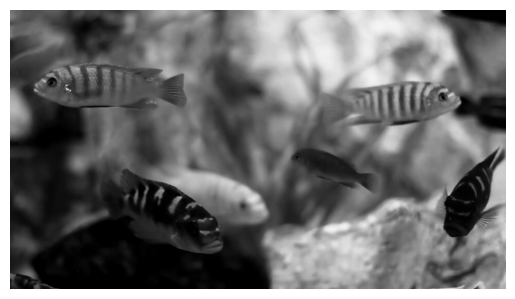

In [44]:
video_path = list(uploaded_video.keys())[0]
cap = cv2.VideoCapture(video_path)

while True:
  ret, frame = cap.read()
  if not ret:
    break

  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray, 100, 200)
  show(gray, cmap='gray')
  break

cap.release()